# Setup

In [1]:
import os
import sys
import time
import csv
import numpy as np
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

# #Make sure to mount drive and that you have access to IDL_group_project. All paths are from the shared folder
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#This function will return both the path and the file names of all files in a directory
def path_file_list_creator(path, both_path_file = False):
  path_file_list = []
  for myfile in os.listdir(path):
    full_path = os.path.join(path,myfile)
    if both_path_file == True:
      path_file_list.append((full_path, myfile))
    else:
      path_file_list.append(full_path)
  return(path_file_list,len(path_file_list))

#Concate all different classes semantic information together from seperate directories
def concate_directories(paths):
  semantic_bundles_paths_extended = []
  total_files = 0 

  for path in paths:
    class_bundle_paths , num_files = path_file_list_creator(path)
    semantic_bundles_paths_extended.extend(class_bundle_paths)
    total_files += num_files
  print("Total Files grabbed ", total_files)
  return(semantic_bundles_paths_extended)

# Precision-Recall curve

Load visual concepts

In [3]:
from numpy import linalg as LA

# Google Colab
# fp_positive_dir = '/content/drive/MyDrive/IDL_group_project/Google_Colab/data/fp_positive/'

# Local
# fp_positive_dir = '/home/tunx404/SSD1/Miscellaneous/IDL/data/fp_positive/'
fp_positive_dir = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/fp_positive_car/'

In [4]:
# fp_positive_npy_paths = concate_directories(all_classes_fp_positive_dir)
fp_positive_npy_paths = concate_directories([fp_positive_dir])

Total Files grabbed  1034


(713, 512)


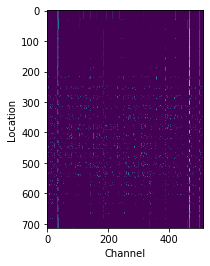

In [15]:
feature_vectors = np.load(fp_positive_npy_paths[0])
print(feature_vectors.shape)
plt.imshow(feature_vectors, interpolation='none')
plt.xlabel('Channel')
plt.ylabel('Location')
plt.show()

In [12]:
# fv_sampled = []

# import random
# for i in tqdm(range(len(fp_positive_npy_paths))):
#     feature_vectors = np.load(fp_positive_npy_paths[i])
#     np.random.shuffle(feature_vectors)
#     fv_sampled.append(feature_vectors[:100])

# feature_vectors = np.concatenate(fv_sampled, axis=0)

In [13]:
# print(feature_vectors.shape)
# from sklearn.preprocessing import normalize
# noramlized_fv = normalize(feature_vectors)
# print(np.linalg.norm(noramlized_fv[0]))
# np.save('/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/normalized_feature_vectors_positive_car', noramlized_fv)

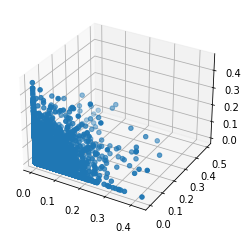

In [22]:
feature_vectors = np.load('/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/normalized_feature_vectors_positive_car.npy')
      
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(feature_vectors[:, 0], feature_vectors[:, 1], feature_vectors[:, 3])
# ax = fig.add_subplot()
# ax.scatter(feature_vectors[:, 100], feature_vectors[:, 200])
plt.show()

In [ ]:
# typically 200 visual concepts were needed for each object
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=200, init='k-means++').fit(noramlized_fv)
visual_concepts = kmeans.cluster_centers_
np.save('/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/visual_concepts_positive_car', visual_concepts)